In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

In [2]:
# Define the names of the politicians, which will be both row and column headers
politicians = [
    'Hitler', 'Mussolini', 'Churchill', 'Eisenhower', 'Stalin', 'Attlee',
    'Franco', 'De_Gaulle', 'Mao_Tse', 'Truman', 'Chamberlain', 'Tito'
]

# The distance data between the politicians, based on the previous image you provided.
# This represents the full symmetric distance matrix.
data = {
    'Hitler': [0, 5, 11, 15, 8, 17, 5, 10, 16, 17, 12, 16],
    'Mussolini': [5, 0, 14, 16, 13, 18, 3, 11, 18, 18, 14, 17],
    'Churchill': [11, 14, 0, 7, 11, 11, 12, 5, 16, 8, 10, 8],
    'Eisenhower': [15, 16, 7, 0, 16, 16, 14, 8, 17, 6, 7, 12],
    'Stalin': [8, 13, 11, 16, 0, 15, 13, 11, 12, 14, 16, 12],
    'Attlee': [17, 18, 11, 16, 15, 0, 16, 12, 16, 12, 9, 13],
    'Franco': [5, 3, 12, 14, 13, 16, 0, 9, 17, 16, 10, 12],
    'De_Gaulle': [10, 11, 5, 8, 11, 12, 9, 0, 13, 9, 11, 7],
    'Mao_Tse': [16, 18, 16, 17, 12, 16, 17, 13, 0, 12, 17, 10],
    'Truman': [17, 18, 8, 6, 14, 12, 16, 9, 12, 0, 9, 11],
    'Chamberlain': [12, 14, 10, 7, 16, 9, 10, 11, 17, 9, 0, 15],
    'Tito': [16, 17, 8, 12, 12, 13, 12, 7, 10, 11, 15, 0]
}

In [11]:
data

{'Hitler': [0, 5, 11, 15, 8, 17, 5, 10, 16, 17, 12, 16],
 'Mussolini': [5, 0, 14, 16, 13, 18, 3, 11, 18, 18, 14, 17],
 'Churchill': [11, 14, 0, 7, 11, 11, 12, 5, 16, 8, 10, 8],
 'Eisenhower': [15, 16, 7, 0, 16, 16, 14, 8, 17, 6, 7, 12],
 'Stalin': [8, 13, 11, 16, 0, 15, 13, 11, 12, 14, 16, 12],
 'Attlee': [17, 18, 11, 16, 15, 0, 16, 12, 16, 12, 9, 13],
 'Franco': [5, 3, 12, 14, 13, 16, 0, 9, 17, 16, 10, 12],
 'De_Gaulle': [10, 11, 5, 8, 11, 12, 9, 0, 13, 9, 11, 7],
 'Mao_Tse': [16, 18, 16, 17, 12, 16, 17, 13, 0, 12, 17, 10],
 'Truman': [17, 18, 8, 6, 14, 12, 16, 9, 12, 0, 9, 11],
 'Chamberlain': [12, 14, 10, 7, 16, 9, 10, 11, 17, 9, 0, 15],
 'Tito': [16, 17, 8, 12, 12, 13, 12, 7, 10, 11, 15, 0]}

In [3]:
# Create a DataFrame from the dictionary, setting the index and columns
# to be the politician names to form the distance matrix.
df_distance = pd.DataFrame(data, index=politicians, columns=politicians)

print("Distance Matrix (World War Politicians):")
print(df_distance)
print("-" * 50)

Distance Matrix (World War Politicians):
             Hitler  Mussolini  Churchill  Eisenhower  Stalin  Attlee  Franco  \
Hitler            0          5         11          15       8      17       5   
Mussolini         5          0         14          16      13      18       3   
Churchill        11         14          0           7      11      11      12   
Eisenhower       15         16          7           0      16      16      14   
Stalin            8         13         11          16       0      15      13   
Attlee           17         18         11          16      15       0      16   
Franco            5          3         12          14      13      16       0   
De_Gaulle        10         11          5           8      11      12       9   
Mao_Tse          16         18         16          17      12      16      17   
Truman           17         18          8           6      14      12      16   
Chamberlain      12         14         10           7      16       

In [12]:
df_distance

,Hitler,Mussolini,Churchill,Eisenhower,Stalin,Attlee,Franco,De_Gaulle,Mao_Tse,Truman,Chamberlain,Tito
Hitler,0,5,11,15,8,17,5,10,16,17,12,16
Mussolini,5,0,14,16,13,18,3,11,18,18,14,17
Churchill,11,14,0,7,11,11,12,5,16,8,10,8
Eisenhower,15,16,7,0,16,16,14,8,17,6,7,12
Stalin,8,13,11,16,0,15,13,11,12,14,16,12
Attlee,17,18,11,16,15,0,16,12,16,12,9,13
Franco,5,3,12,14,13,16,0,9,17,16,10,12
De_Gaulle,10,11,5,8,11,12,9,0,13,9,11,7
Mao_Tse,16,18,16,17,12,16,17,13,0,12,17,10
Truman,17,18,8,6,14,12,16,9,12,0,9,11


In [4]:
# Convert the DataFrame to a NumPy array, which is the format sklearn's MDS expects
distance_matrix = df_distance.values

In [5]:
# n_components=2: We want to reduce the data to 2 dimensions for visualization.
# dissimilarity='precomputed': We are providing a precomputed distance matrix.
# random_state: Set for reproducibility of results.
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)

In [6]:
# Fit the model and transform the data
mds_result = mds.fit_transform(distance_matrix)

print("\nMDS Result (2-dimensional coordinates):")


MDS Result (2-dimensional coordinates):


In [7]:
# Create a DataFrame to store the MDS results for better readability
mds_df = pd.DataFrame(mds_result, index=politicians, columns=['Dimension 1', 'Dimension 2'])
print(mds_df)
print("-" * 50)

             Dimension 1  Dimension 2
Hitler          8.456274     2.278292
Mussolini      10.843789    -0.692751
Churchill      -2.085066    -1.962687
Eisenhower     -2.807598    -8.156923
Stalin          3.651738     8.128422
Attlee        -10.963555    -0.284193
Franco          8.032692    -1.705265
De_Gaulle       0.030121     0.137088
Mao_Tse        -4.689717    11.041273
Truman         -6.549266    -5.089881
Chamberlain     0.919077    -8.319612
Tito           -4.838490     4.626237
--------------------------------------------------


## Observations

- **Positive Dimension 1**: Mussolini, Hitler, and Franco cluster together, indicating higher similarity in the underlying data.
- **Negative Dimension 1**: Attlee, Truman, Mao Tse, and Eisenhower lie on the opposite side, suggesting greater dissimilarity from the first group.
- **Positive Dimension 2**: Mao Tse and Stalin are distinctly separated upward in the 2D space.
- **Negative Dimension 2**: Eisenhower and Chamberlain are placed lower, forming a separate grouping.
- Politicians close together in both dimensions indicate higher similarity.

---

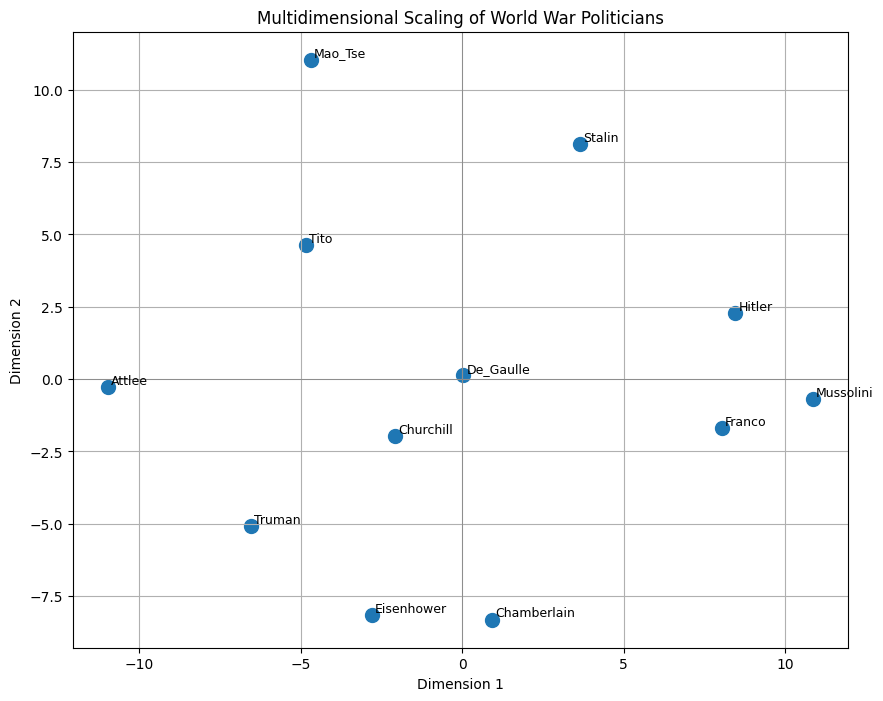

In [10]:
# Visualization
# Plotting the 2D representation of the politicians
plt.figure(figsize=(10, 8))
plt.scatter(mds_result[:, 0], mds_result[:, 1], s=100) # Plot points
# Annotate each point with the politician's name for clarity
for i, politician in enumerate(politicians):
    plt.annotate(politician, (mds_result[i, 0] + 0.1, mds_result[i, 1] + 0.1), fontsize=9)

plt.title('Multidimensional Scaling of World War Politicians')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.axhline(0, color='grey', linewidth=0.5) # Add x-axis
plt.axvline(0, color='grey', linewidth=0.5) # Add y-axis
plt.show()